<a href="https://colab.research.google.com/github/paulo-rego/bootcamp-alura/blob/main/Paulo_R%C3%AAgo_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivação
Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.


E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)



# Resumo:

Foram analisados os dados de casos confirmados de Covid-19 para alguns estados brasileiros selecionados
Descobrimos que: 
 - as estatísticas de novos casos oscilam muito
 - o número de casos confirmados deve ser dividido pela população para termos um retrato mais fiel à realidade
 - o número de casos confirmados é enviesado pelo fato de que lugares diferentes realizam mais ou menos testes  

Em seguida analisamos dados sobre a vacinação no Brasil e no mundo, tendo em vista que a maior esperança para combater a pandemia de Covid-19 é a imunização por vacinas. Os dados nacionais foram retirados do Tabnet. Os dados globais foram retirados do site da OMS.
 - Reparamos que o Brasil tem um histórico acima da média global de cobertura vacinal
 - Notamos que infelizmente esse quadro tem piorado pois a cobertura vacinal vem diminuindo nos últimos anos, em particular desde 2016-2017

Comparamos os dados brasileiros com estimativas globais de vacinação
 - Vimos que em quase todas as regiões do mundo a cobertura vacinal vem se mantendo ou aumentando nos últimos anos
 - Concluímos que o Brasil está em uma tendência contrária à do resto mundo no que diz respeito à imunização por vacinas


# Análise dos dados:


## Parte 1: COVID-19 no Brasil

In [ ]:
#@title Carrega bibliotecas
# Carregando algumas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.ticker as ticker
from zipfile import ZipFile
import requests
import seaborn as sns

In [ ]:
#@title Aquisição dados do Kaggle (não foram utilizados)
# Para utilizar a API do Kaggle, precisamos primeiramente de uma chave para conectarmos na API
# oficial do Kaggle. Basta registrar no site e pedir para vincular uma chave à sua conta que ele
# gera um arquivo json com a sua chave. O código a seguir utiliza uma biblioteca do colab para
# abrir um prompt de upload de arquivos, onde quem está rodando o código pode selecionar o arquivo 
# com a chave para o Kaggle. Em seguida o código copia o arquivo para a pasta adequada e carrega
# o módulo para interagir com o Kaggle

#from google.colab import files

#uploaded = files.upload()

#!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

#import kaggle

#Aqui utilizamos a API do Kaggle para baixar a base de mortes registradas no Brasil
#!kaggle datasets download amandalk/registered-deaths-brazil

#Como a base é baixada como um arquivo zip, precisamos descompactá-lo
#with ZipFile("/content/registered-deaths-brazil.zip", "r") as arquivoZip:
# arquivoZip.extractall()

#Lendo o conteúdo de mortes registradas
#mortes_registradas = pd.read_csv("/content/deaths_brazil.csv")

#Aqui verificamos se saiu tudo bem com a leitura da base de mortes registradas
#mortes_registradas.head()

Saving kaggle.json to kaggle.json


In [ ]:
#@title Aquisição de dados sobre a Covid-19
# Agora vamos baixar os dados de covid do brasil.io
caminho_casos_full = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"

req = requests.get(caminho_casos_full)
with open('caso_full.csv.gz', 'wb') as outfile:
    outfile.write(req.content)

caso_full = pd.read_csv("caso_full.csv.gz",compression = "gzip", engine = "python", decimal = ",")

In [ ]:
#@title Aquisição de dados de óbitos (não foram utilizados)
# Vamos também baixar os dados de óbitos dos cartórios de registro civil
# Essa base serve para termos uma comparação mais específica dos motivos
# que estão levando as pessoas a óbito

caminho_obitos_2019 = "https://transparencia.registrocivil.org.br/covid/obitos-2019.csv"
caminho_obitos_2020 = "https://transparencia.registrocivil.org.br/covid/obitos-2020.csv"

# O site do registro civil bloqueia downloads diretos que não sejam pelo navegador.
# Temos então que simular o acesso aos arquivos como se estivéssemos usando um navegador.

# Esse comando vai instalar o módulo na primeira vez que for executado na máquina
!pip install fake_useragent

# Importamos a função que precisamos para simular um acesso via navegador
from fake_useragent import UserAgent

ua = UserAgent().chrome

req = requests.get(caminho_obitos_2019,  headers={"User-Agent": ua})
with open('obitos_2019.csv', 'wb') as outfile:
    outfile.write(req.content)

req = requests.get(caminho_obitos_2020,  headers={"User-Agent": ua})
with open('obitos_2020.csv', 'wb') as outfile:
    outfile.write(req.content)

obitos_2019 = pd.read_csv("obitos_2019.csv", engine = "python", thousands = ".", decimal = ",")
obitos_2020 = pd.read_csv("obitos_2020.csv", engine = "python", thousands = ".", decimal = ",")

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=f78afb0316ecc1f60f90bc07e26f5161b637e5155f3c9489a1025fd60dfedad0
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built fake-useragent


In [ ]:
#@title Exploração os dados de Covid-19
# Vamos filtrar apenas as linhas referentes aos estados. 
# (Trabalharemos com alguns municípios específicos posteriormente se der tempo)

caso_full_estado = caso_full[caso_full["place_type"] == "state"].drop(["city","city_ibge_code"], axis = 1)

# De posse dos dados, podemos começar com algumas análises exploratórias
caso_full_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6808 entries, 1 to 1083662
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   date                                           6808 non-null   object 
 1   epidemiological_week                           6808 non-null   int64  
 2   estimated_population                           6808 non-null   float64
 3   estimated_population_2019                      6808 non-null   float64
 4   is_last                                        6808 non-null   bool   
 5   is_repeated                                    6808 non-null   bool   
 6   last_available_confirmed                       6808 non-null   int64  
 7   last_available_confirmed_per_100k_inhabitants  6802 non-null   float64
 8   last_available_date                            6808 non-null   object 
 9   last_available_death_rate                      68

Podemos ver que em geral não há dados faltantes, sendo que a única exceção é a coluna "last_available_confirmed_per_100k_inhabitants" que nos diz se a informação de casos confirmados por 100 mil habitantes é a mais recente disponível para aquele estado. Vamos verificar o que aconeceu com esses 6 dados faltantes e descobrir se precisamos nos preocupar com isso...

In [ ]:
#@title Encontrando os dados faltantes
caso_full_estado[caso_full_estado["last_available_confirmed_per_100k_inhabitants"].isna()]

,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
134,2020-03-12,11,4039277.0,4018127.0,False,False,0,NaN,2020-03-12,0.0,0,1,state,PB,0,0
173,2020-03-13,11,4039277.0,4018127.0,False,False,0,NaN,2020-03-13,0.0,0,2,state,PB,0,0
220,2020-03-14,11,4039277.0,4018127.0,False,False,0,NaN,2020-03-14,0.0,0,3,state,PB,0,0
269,2020-03-15,12,4039277.0,4018127.0,False,False,0,NaN,2020-03-15,0.0,0,4,state,PB,0,0
328,2020-03-16,12,4039277.0,4018127.0,False,False,0,NaN,2020-03-16,0.0,0,5,state,PB,0,0
400,2020-03-17,12,4039277.0,4018127.0,False,False,0,NaN,2020-03-17,0.0,0,6,state,PB,0,0


Descobrimos que todos os casos de dados faltantes são da Paraíba e que ocorreram nos dias 12 a 17 de março, no início da pandemia no Brasil. Também podemos notar que esses eram os primeiros boletins do estado (dados pela coluna order_for_place) e que ainda não havia casos confirmados. Portanto a ausência desses números é inócua e podemos preencher com 0 apenas para não termos que nos preocupar com eles na hora de plotar gráficos ou fazer contas.

In [ ]:
#@title Preenchendo os dados faltantes
caso_full_estado["last_available_confirmed_per_100k_inhabitants"].fillna(0, inplace = True)

Feito isso, vamos remover algumas colunas que não usaremos. Isso pode nos dar um pouquinho de agilidade nas próximas operações com os dados. Escolhemos remover a coluna *estimated_population_2019* pois ela está desatualizada e temos a estimativa de população para 2020. Também  removeremos a coluna *place_type* pois já sabemos que nesse dataframe estamos trabalhando apenas com o agregado dos estados.

Para facilitar nossas visualizações, vamos escolher alguns estados. Eu escolhi o DF, onde habito, pois foi um dos estados que teve as primeiras medidas bem restritivas de fechamento de comércio. Também colocaremos na análise São Paulo e Rio de Janeiro pela maior dinâmica populacional (eles provavelmente se comportarão como extremos da dinâmica de progressão da pandemia). Também utilizaremos os outros estados da região Centro-Oeste para um efeito de comparação regional com o DF.

In [ ]:
#@title Tratando os dados de Covid-19
caso_full_estado.drop(["place_type","estimated_population_2019"],axis = 1, inplace = True)

estados_selecionados = ["DF","MT","MS","SP","RJ","GO"]

caso_selecionados = caso_full_estado[caso_full_estado["state"].isin(estados_selecionados)]

# Como de agora em diante vamos trabalhar com a tabela caso_selecionados, vou aproveitar e converter os valores
# da coluna date para uma datetime series do pandas. Isso facilitará operações, manipulações e plots de agora em diante

caso_selecionados["datetime"] = pd.to_datetime(caso_selecionados["date"], yearfirst=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Vamos partir para nossa primeira visualização. Vamos plotar os novos casos confirmados por data.

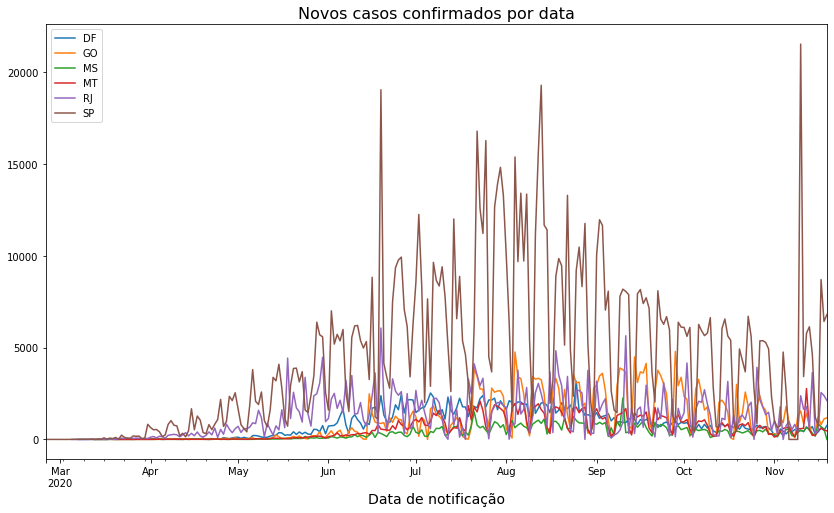

In [ ]:
#@title Novos casos confirmados por data
fig, ax = plt.subplots()

for key, grp in caso_selecionados.groupby("state"):
    ax = grp.plot(ax=ax, kind='line', x="datetime", y="new_confirmed", label=key, figsize = (14,8))
plt.title("Novos casos confirmados por data", fontsize = 16)
plt.legend()
plt.xlabel("Data de notificação", fontsize = 14)
plt.show()

Já temos uma visualização interessante. Porém podemos notar alguns problemas:
* Há uma oscilação que parece retornar a valores muito baixos em intervalores regulares
 * Hipótese: Poderá ser causado pelo menor número de notificações no fim de semana?
  * Para resolver o caso do fim de semana, podemos adotar a prática de utilizar a média móvel de 7 ou 14 dias, que suavizará a curva. Também podemos interpolar os valores de sábado e domingo com base nos valores de sexta e segunda
* Há um pico que ocorreu nas últimas semanas em São Paulo que parece desproporcional à tendência das curvas
 * Hipóteses: problema nos dados ou de fato houve um boom de testagens ou de casos?
  * Uma busca rápida sugere que de fato há um aumento no número de casos em São Paulo: https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/11/16/governo-alega-precaucao-e-adia-reclassificacao-do-plano-sp.htm

In [ ]:
#@title Gera a média móvel
caso_selecionados.sort_values(["state","datetime"], inplace = True)

caso_selecionados = caso_selecionados.assign(media_movel_confirmed = caso_selecionados.groupby("state").rolling(14)["new_confirmed"].mean().values)
caso_selecionados = caso_selecionados.assign(media_movel_deaths = caso_selecionados.groupby("state").rolling(14)["new_deaths"].mean().values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


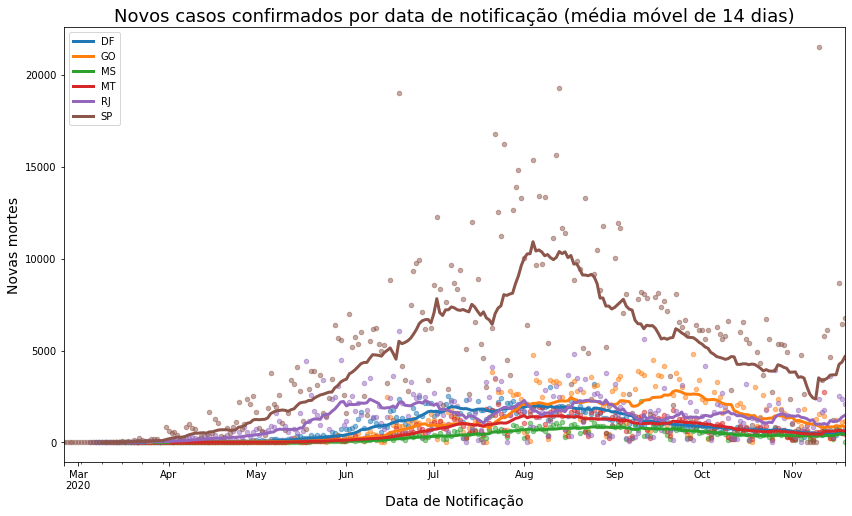

In [ ]:
#@title Novos casos confirmados por data de notificação (média móvel de 14 dias)
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in caso_selecionados.groupby("state"):
    ax = grp.plot(ax=ax, kind='line',linewidth = 3, x="datetime", y="media_movel_confirmed", label=key, figsize = (14,8), color = color)
    ax = grp.plot(ax=ax, kind= "scatter", alpha= 0.5, x="datetime", y="new_confirmed", figsize = (14,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    
plt.title("Novos casos confirmados por data de notificação (média móvel de 14 dias)", fontsize = 18)
plt.legend()
plt.xlabel("Data de Notificação", fontsize=14)
plt.ylabel("Novas mortes", fontsize=14)
plt.yscale("linear")
plt.show()

Utilizando a média móvel para suavizar a curva já podemos ter uma ideia melhor da evolução da doença nos estados selecionados. Utilizando uma escala logarítmica para o eixo y, podemos ter uma visualização ainda melhor

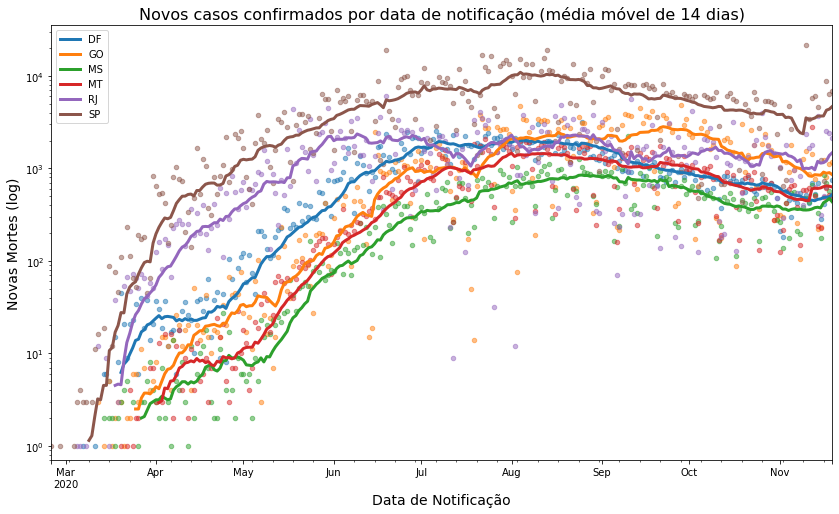

In [ ]:
#@title Novos casos confirmados (média móvel)
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in caso_selecionados.groupby("state"):
    ax = grp.plot(ax=ax, kind='line',linewidth = 3, x="datetime", y="media_movel_confirmed", label=key, figsize = (14,8), color = color)
    ax = grp.plot(ax=ax, kind= "scatter", alpha= 0.5, x="datetime", y="new_confirmed", figsize = (14,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    
plt.title("Novos casos confirmados por data de notificação (média móvel de 14 dias)", fontsize = 16)
plt.legend()
plt.xlabel("Data de Notificação", fontsize=14)
plt.ylabel("Novas Mortes (log)", fontsize=14)
plt.yscale("log")
plt.show()

Podemos ter uma visualização melhor de como as infecções por Covid-19 evoluiram nesses estados. Notamos que São Paulo claramente tem o maior número absoluto de infecções.  
**Pergunta:** Isso significa que São Paulo se sai pior no combate à pandemia?  
**Resposta:** Não necessariamente. Sabemos que São Paulo é o estado mais populoso do país, portanto, é esperado que ele tenha mais infecções em valores absolutos.

Para podermos comparar estados, precisamos de uma medida que leve em consideração que cada estado tem uma população diferente. Por isso vamos usar as medidas de Casos confirmados por 100 mil habitantes. Isso nos dá um parâmetro que pode comparado entre estados (com ressalvas).
  - Embora os casos por 100 mil habitantes forneçam uma primeira estatística comparável entre estados, há vários fatores que poderíamos levar em consideração. Por exemplo, estados diferentes também têm densidades de população diferentes e isso pode influenciar a facilidade com que o vírus se propaga. Também poderíamos apontar que estados diferentes têm uma proporção diferente de população urbana e rural e isso pode influenciar a velocidade de contaminação. Para os efeios deste estudo inicial, as estatísticas a cada 100 mil habitantes vão bastar.

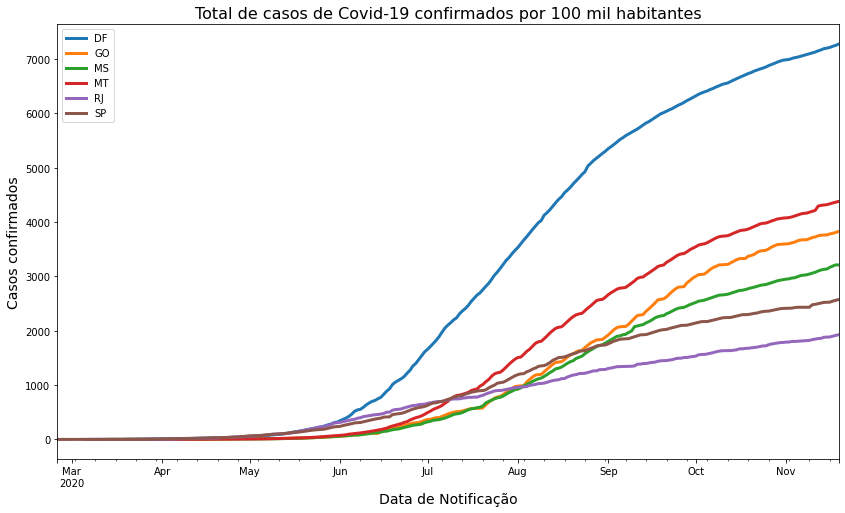

In [ ]:
#@title Total de casos de Covid-19 confirmados por 100k habitantes
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in caso_selecionados.groupby("state"):
    ax = grp.plot(ax=ax, kind='line',linewidth = 3, x="datetime", y="last_available_confirmed_per_100k_inhabitants", label=key, figsize = (14,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    
plt.title("Total de casos de Covid-19 confirmados por 100 mil habitantes", fontsize = 16)
plt.legend()
plt.xlabel("Data de Notificação", fontsize=14)
plt.ylabel("Casos confirmados", fontsize=14)
plt.yscale("linear")
plt.show()

Aparentemente observamos que (pelo menos pela minha percepção da mídia), a região centro-oeste está bem pior do que se imagina dado que a cobertura da imprensa nacional geralmente foca em São Paulo e Rio de Janeiro. Podemos observar que o DF está com um número bem elevado de casos por habitante. Também é notável que apesar de terem começado com um aumento no número de casos mais tardio, os outros estados da região centro-oeste ultrapassaram Rio de Janeiro e São Paulo por essa medida.

Por essa medida temos a impressão de que o DF está em uma situação péssima, porém, podemos ter uma explicação.
- Hipótese: o DF testa mais a sua população que os outros estados
- O número de casos confirmados pode ser uma medida que engana pois só são confirmados quem foi testado e, portanto, quanto mais gente testada, mais chances de ter casos confirmados. Para testar essa hipótese, vamos atrás de dados sobre o número de testes realizados por estado.

Vamos então utilizar os dados disponíveis em https://github.com/wcota/covid19br para analisar o número de testes realizados por estado

In [ ]:
#@title Aquisição e tratamento dos dados de testes realizados
#Guarda o caminha para baixar os dados de testes
caminho_testes = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
 
# Lê a tabela
testes = pd.read_csv(caminho_testes)
 
#Seleciona apenas os dados de estados que já estão na nossa comparação
testes = testes[testes["state"].isin(estados_selecionados)]
 
#Guarda uma tabela reduzida, apenas com os dados que queremos usar agora
testes = testes[["date","state", "city","tests"]]
 
#Ordena os dados
testes.sort_values(["state","date"], inplace = True)
 
#Vamos criar um dataframe com as populações estimadas por estado
population = caso_selecionados[["state","estimated_population"]].groupby("state").mean().reset_index()
 
#E agora popular a tabela de testes com a populacao estimada
testes = testes.merge(population, on = "state")
 
#Para então criar uma coluna de testes por 100k habitantes
testes = testes.assign(testes_por_100k = lambda x: (x.tests * 100000) / x.estimated_population)

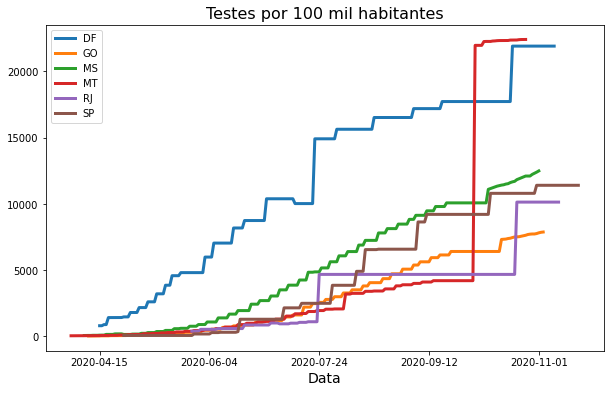

In [ ]:
#@title Testes por 100 mil habitantes
#E agora plotamos essa estatística
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in testes.groupby("state"):
    ax = grp.plot(ax=ax, kind='line',linewidth = 3, x="date", y="testes_por_100k", label=key, figsize = (10,6), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Testes por 100 mil habitantes", fontsize = 16)

plt.legend()
plt.xlabel("Data", fontsize=14)
plt.ylabel("", fontsize=14)
plt.yscale("linear")
plt.show()

## Resultados da Parte 1

Traçamos primeiramente algumas análises exploratórias para entender o progresso da Covid na região centro-oeste e nos estados do Rio de Janeiro e São Paulo

Primeiramente notamos que o número de novos casos confirmados por dia oscila muito devido à subnotificação nos fins de semana

Percebemos que a estatística do número de casos confirmados pode nos dar uma análise enviesado pois ela não leva em consideração os diferentes tamanhos de população e, para compensar isso, utilizamos a estatística de casos confirmados por 100 mil habitantes.

Notamos também que ainda há uma distorção na informação de casos confirmados por 100 mil habitantes pois quanto mais testes realizados, mais casos confirmados.


Podemos observar então que, de fato, que o DF testa mais que os outros estados, em geral, ficando atrás apenas do MT no grupo selecionado(??).Isso pode explicar porque o DF que tomou várias medidas restritivas de circulação no início da pandemia e executou políticas de testagem em massa apresenta um número alto de casos confirmados por 100 mil habitantes.

- A grande descontinuidade na curva de testes realizados no Mato Grosso nos sugere que há um problema com nossos dados
 - Ou havia um grande número de dados de testes represados e que subitamente foram computados pela secretaria de saúde, ou de fato foram realizados muitos testes de uma só vez ou foi mudado o modo como são calculados ou adquiridos os dados na nossa fonte 
 - Verificando os dados no site da secretaria de saúde, podemos confirmar que o número de testes por 100k habitantes se aproxima do encontrado então, por mais que haja algum problema com a série, podemos confiar na conclusão final  dada a última informação disponível. Fonte: http://www.saude.mt.gov.br/painelcovidmt2/
  - Analisando a documentação disponível para a fonte dos dados utilizados no gráfico, podemos notar que aproximadamente na data onde há a grande descontinuidade no MT, foi alterada a fonte desses dados. Nessa troca deixaram de ser considerados apenas os testes RT-PCR (swab nasal) e passaram a incluídos os testes rápidos realizados. Essa provavelmente é a explicação.

## Parte 2: VACINAS

A grande esperança no combate à pandemia é o desenvolvimento de vacinas. Pegando esse gancho, resolvi avaliar como anda a vacinação no Brasil. Anedoticamente, há uma sensação de que a vacinação anda "fora de moda" e que isso pode causar uma falta de credibilidade e dificuldade no uso de uma vacina para combater a Covid-19. Vamos verificar como anda a vacinação no Brasil, nos estados que foram analisados anteriormente e no mundo.
Utilizaremos dados do DataSUS e da OMS para comparar as vacinas BCG, Tríplice Viral, DTP e Hepatite B

In [ ]:
#@title Aquisição dos dados globais de vacinas
caminho_oms = "https://data.unicef.org/wp-content/uploads/2020/07/Immunization-coverage-by-antigen-country-regional-and-global-trends-WUENIC-2019revision.xlsx"

ua = UserAgent().chrome

req = requests.get(caminho_oms,  headers={"User-Agent": ua})

with open("dados_oms.xlsx", 'wb') as outfile:
    outfile.write(req.content)

vacinas_oms = pd.read_excel("/content/dados_oms.xlsx",sheet_name="regional_global")

Para manter esse exemplo reprodutível, eu fiz o upload das bases de cobertura vacinal para o meu github. Os dados foram acessados no tabnet no dia 18 de novembro de 2020

In [ ]:
#@title Aquisição dos dados nacionais de vacinas
# Vou deixar comentando as linhas usadas para ler do meu Drive, que foi o método que eu usei antes de migrar para o github

#brasil_bcg = pd.read_csv("/content/drive/MyDrive/vacinabcg.csv",encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = "," )
#brasil_dtp = pd.read_csv("/content/drive/MyDrive/vacinadtp.csv",encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = ",")
#brasil_hepb = pd.read_csv("/content/drive/MyDrive/hepatiteb.csv",encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = ",")
#brasil_trpv = pd.read_csv("/content/drive/MyDrive/tripliceviral.csv",encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = ",")

# Salvando os links para os datasets de cobertura vacinal
caminho_hepb = "https://raw.githubusercontent.com/paulo-rego/datasetsbootcamp-/main/hepatiteb.csv"
caminho_bcg = "https://raw.githubusercontent.com/paulo-rego/datasetsbootcamp-/main/vacinabcg.csv"
caminho_dtp = "https://raw.githubusercontent.com/paulo-rego/datasetsbootcamp-/main/vacinadtp.csv"
caminho_trpv = "https://raw.githubusercontent.com/paulo-rego/datasetsbootcamp-/main/tripliceviral.csv"

# Baixando os datasets de vacina
brasil_bcg = pd.read_csv(caminho_hepb, encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = "," )
brasil_dtp = pd.read_csv(caminho_bcg, encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = ",")
brasil_hepb = pd.read_csv(caminho_hepb, encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = ",")
brasil_trpv = pd.read_csv(caminho_trpv,encoding= "ISO-8859-1", sep=";", engine = "python", thousands = ".", decimal = ",")

In [ ]:
#@title Tratamento dos dados nacionais de vacinas
#Remove as linhas de totais
brasil_bcg.drop(" Total", axis = 1, inplace = True)
brasil_dtp.drop(" Total", axis = 1, inplace = True)
brasil_hepb.drop(" Total", axis = 1, inplace = True)
brasil_trpv.drop(" Total", axis = 1, inplace = True)

#Remove a coluna Unidade da Federação
brasil_bcg.drop("Unidade da Federação", axis = 1, inplace = True)
brasil_dtp.drop("Unidade da Federação", axis = 1, inplace = True)
brasil_hepb.drop("Unidade da Federação", axis = 1, inplace = True)
brasil_trpv.drop("Unidade da Federação", axis = 1, inplace = True)


#Cria a lista de siglas de UFs
UFs = ["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN","PB","PE","AL","SE","BA","MG","ES","RJ","SP","PR","SC","RS","MS","MT","GO","DF", "Total"]

brasil_bcg.insert(0,"UF",UFs )
brasil_dtp.insert(0,"UF",UFs )
brasil_hepb.insert(0,"UF",UFs )
brasil_trpv.insert(0,"UF",UFs )

#Agora vamos filtrar apenas os estados que queremos e o total
brasil_bcg = brasil_bcg[brasil_bcg["UF"].isin(estados_selecionados + ["Total"])]
brasil_dtp = brasil_dtp[brasil_dtp["UF"].isin(estados_selecionados + ["Total"])]
brasil_hepb = brasil_hepb[brasil_hepb["UF"].isin(estados_selecionados + ["Total"])]
brasil_trpv = brasil_trpv[brasil_trpv["UF"].isin(estados_selecionados + ["Total"])]

#E mudar o nome Total para Brasil, por fins de clareza
brasil_bcg.UF[27] = "Brasil"
brasil_dtp.UF[27] = "Brasil"
brasil_hepb.UF[27] = "Brasil"
brasil_trpv.UF[27] = "Brasil"

#Vamos zerar o valor da cobertura de triplice viral em 1999 pois ele provavelmente é um erro de cálculo na base
brasil_trpv.iloc[6,1] = 0

#Aqui vamos passar os dataframes para o formato longo
bcg = brasil_bcg.melt("UF", var_name = "ano",value_name = "cobertura")
dtp = brasil_dtp.melt("UF", var_name = "ano",value_name = "cobertura")
hepb = brasil_hepb.melt("UF", var_name = "ano",value_name = "cobertura")
trpv = brasil_trpv.melt("UF", var_name = "ano",value_name = "cobertura")

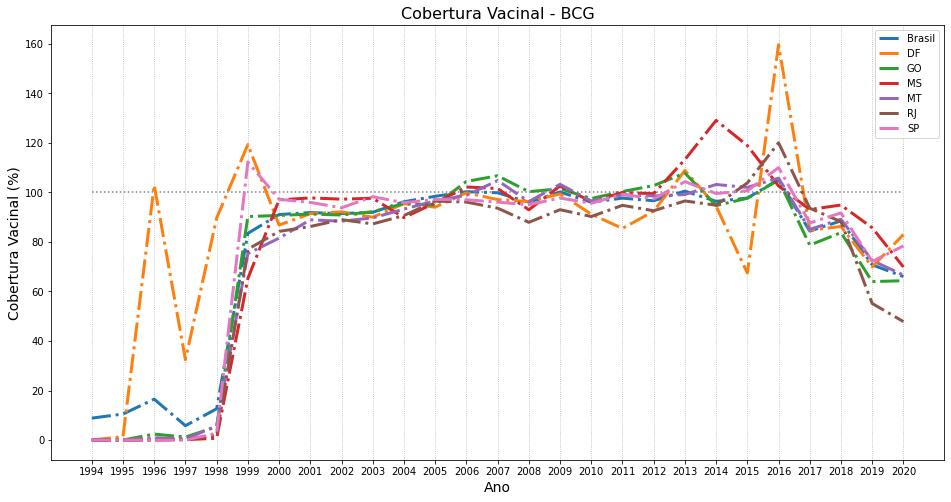

In [ ]:
#@title Cobertura Vacinal (Brasil) - BCG
fig, ax = plt.subplots()


color = next(ax._get_lines.prop_cycler)['color']
for key, grp in bcg.groupby("UF"):
    ax = grp.plot(ax=ax, kind='line', linestyle = "dashdot",linewidth = 3, x="ano", y="cobertura", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal - BCG", fontsize = 16)
plt.hlines(100,0,26,color = "grey", linestyles='dotted', label="")
plt.xticks(list(range(0,27)), list(range(1994,2021)))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Cobertura Vacinal (%)", fontsize=14)
plt.yscale("linear")
plt.show()

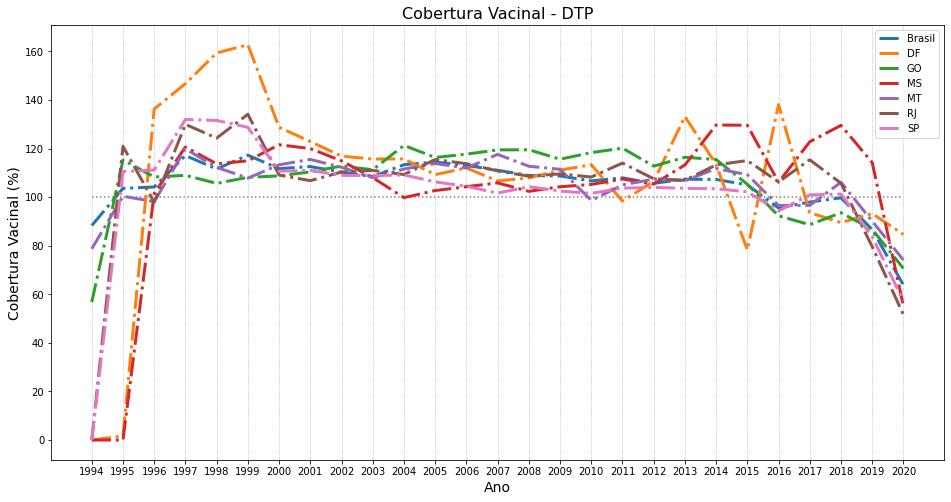

In [ ]:
#@title Cobertura Vacinal (Brasil)- DTP
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in dtp.groupby("UF"):
    ax = grp.plot(ax=ax, kind='line', linestyle = "dashdot",linewidth = 3, x="ano", y="cobertura", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal - DTP", fontsize = 16)
plt.hlines(100,0,26,color = "grey", linestyles='dotted', label="")
plt.xticks(list(range(0,27)), list(range(1994,2021)))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Cobertura Vacinal (%)", fontsize=14)
plt.yscale("linear")
plt.show()

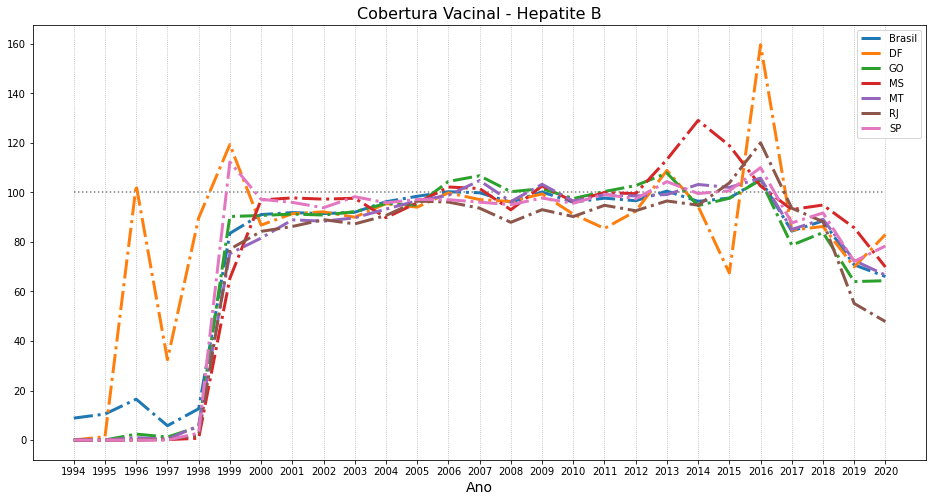

In [ ]:
#@title Cobertura Vacinal (Brasil) - Hepatite B
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in hepb.groupby("UF"):
    ax = grp.plot(ax=ax, kind='line', linestyle = "dashdot",linewidth = 3, x="ano", y="cobertura", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal - Hepatite B", fontsize = 16)
plt.hlines(100,0,26,color = "grey", linestyles='dotted', label="")
plt.xticks(list(range(0,27)), list(range(1994,2021)))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("", fontsize=14)
plt.yscale("linear")
plt.show()

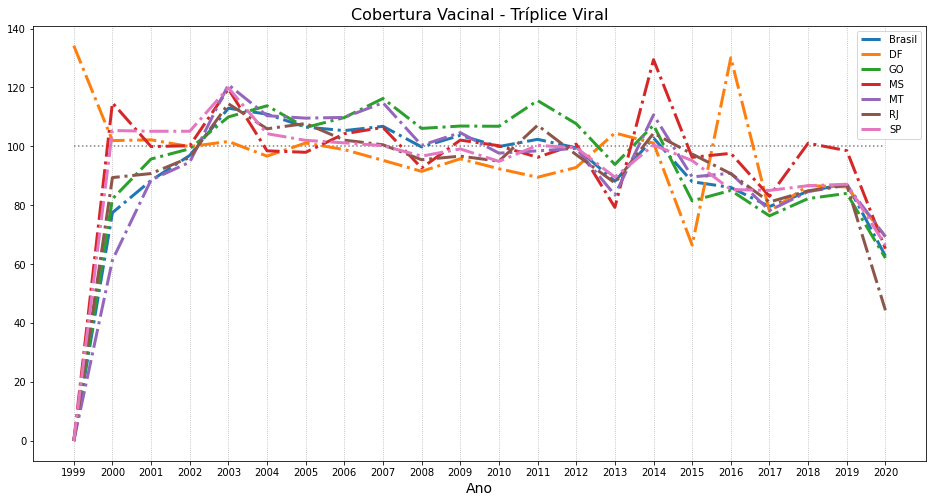

In [ ]:
#@title Cobertura Vacinal (Brasil) - Tríplice Viral
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in trpv.groupby("UF"):
    ax = grp.plot(ax=ax, kind='line', linestyle = "dashdot",linewidth = 3, x="ano", y="cobertura", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal - Tríplice Viral", fontsize = 16)
plt.hlines(100,0,21,color = "grey", linestyles='dotted', label="")
plt.xticks(list(range(0,22)), list(range(1999,2021)))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("", fontsize=14)
plt.yscale("linear")
plt.show()

Com os gráficos podemos reparar a triste realidade de que algumas doenças que estavam com cobertura vacinal acima de 100% há alguns anos já não têm mais a mesma abrangência. Esse panorama não nos permite inferir porque isso ocorre. Para isso precisaríamos de mais informações. Mas podemos ver que as taxas de vacinação, seja por quais forem os motivos, estão em tendência de queda no Brasil, sendo que o ponto de inflexão parece ser próximo ao ano 2016


Vamos agora tentar traçar o panorama global das vacinas utilizando as estimativas da OMS

In [ ]:
#@title Tratamento dos dados globais de vacinas
 
# Primeiramente vamos filtrar as estimativas apenas a partir de 1994  já que nossos dados para o Brasil são a partir de 1994
# Assim tempos um período mais ou menos igual de comparação
vacinas_oms = vacinas_oms[vacinas_oms.year >= 1994]
 
#Selecionando as vacinas específicas que vamos comparar
global_bcg = vacinas_oms[vacinas_oms.vaccine == "BCG"]
global_hepb3 = vacinas_oms[vacinas_oms.vaccine == "HEPB3"]
global_dtp1 = vacinas_oms[vacinas_oms.vaccine == "DTP1"]
global_dtp3 = vacinas_oms[vacinas_oms.vaccine == "DTP3"]
global_mcv2= vacinas_oms[vacinas_oms.vaccine == "MCV2"]
global_mcv1= vacinas_oms[vacinas_oms.vaccine == "MCV1"]
global_rcv1 = vacinas_oms[vacinas_oms.vaccine == "RCV1"]

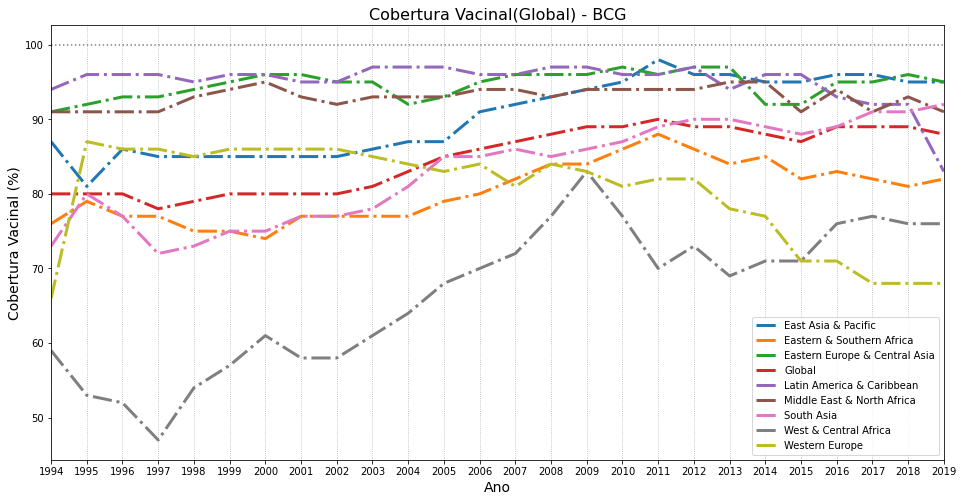

In [ ]:
#@title Cobertura Vacinal (Global) - BCG
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in global_bcg.groupby("region"):
    ax = grp.plot(ax=ax,xlim = (1994,2019), kind='line', linestyle = "dashdot",linewidth = 3, x="year", y="coverage", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal(Global) - BCG", fontsize = 16)
plt.hlines(100,1994,2019,color = "grey", linestyles='dotted', label="")
plt.xticks(np.arange(1994, 2020, step=1))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Cobertura Vacinal (%)", fontsize=14)
plt.yscale("linear")
plt.show()

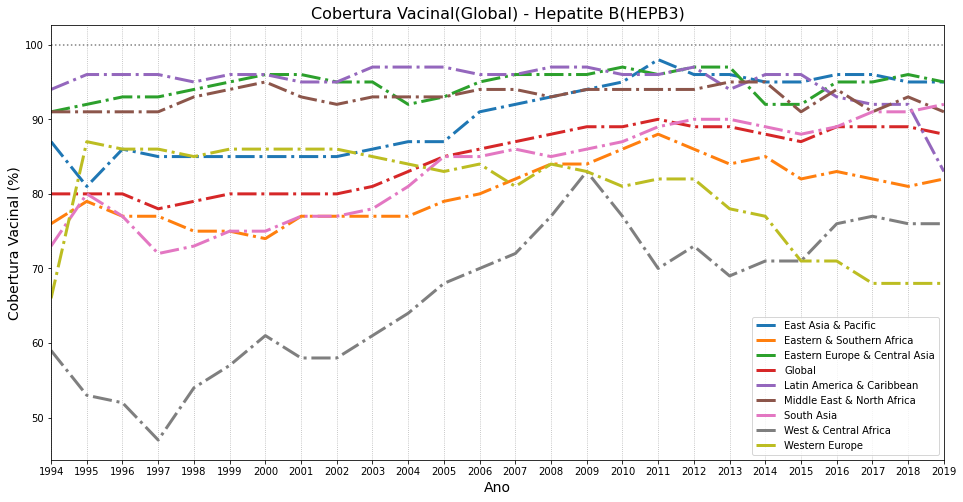

In [ ]:
#@title Cobertura Vacinal(Global) - Hepatite B (HEPB3)
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in global_bcg.groupby("region"):
    ax = grp.plot(ax=ax,xlim = (1994,2019), kind='line', linestyle = "dashdot",linewidth = 3, x="year", y="coverage", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal(Global) - Hepatite B(HEPB3)", fontsize = 16)
plt.hlines(100,1994,2019,color = "grey", linestyles='dotted', label="")
plt.xticks(np.arange(1994, 2020, step=1))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Cobertura Vacinal (%)", fontsize=14)
plt.yscale("linear")
plt.show()

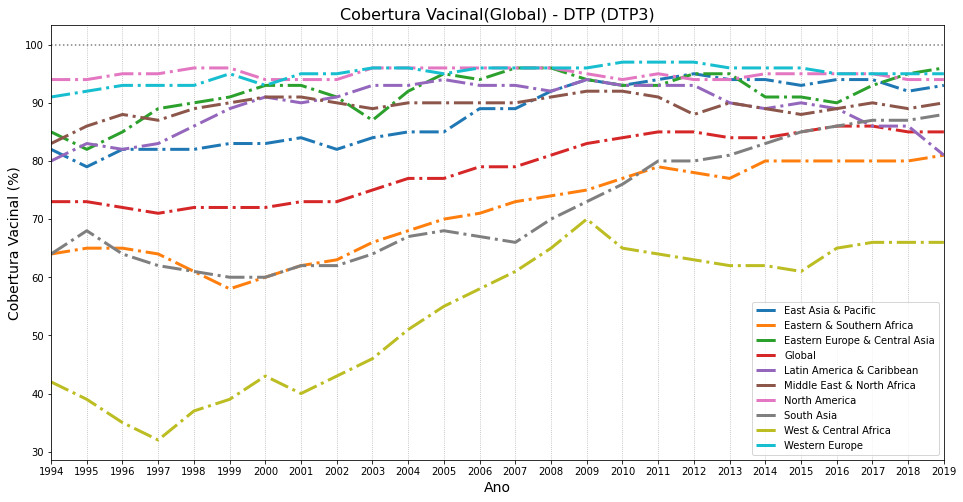

In [ ]:
#@title Cobertura Vacinal (Global) - DTP (DTP3)
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in global_dtp3.groupby("region"):
    ax = grp.plot(ax=ax,xlim = (1994,2019), kind='line', linestyle = "dashdot",linewidth = 3, x="year", y="coverage", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal(Global) - DTP (DTP3)", fontsize = 16)
plt.hlines(100,1994,2019,color = "grey", linestyles='dotted', label="")
plt.xticks(np.arange(1994, 2020, step=1))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Cobertura Vacinal (%)", fontsize=14)
plt.yscale("linear")
plt.show()

Por fim, para os último gráficos do quadro global, precisamos primeiramente fazer um esclarecimento. A vacina que chamamos de tríplice viral contém os imunizantes para Sarampo, Rubéola e Caxumba. Não temos pela OMS dados globais para uma vacina similar, mas temos as vacinas MCV1 e MCV2 que são relativos a 1 ou 2 doses, respectivamente, para imunização contra Sarampo e a vacina RCV1 para imunização contra Rubéola. Vamos então utilizar a MCV1 e RCV1 para servir como comparação à tríplice viral.

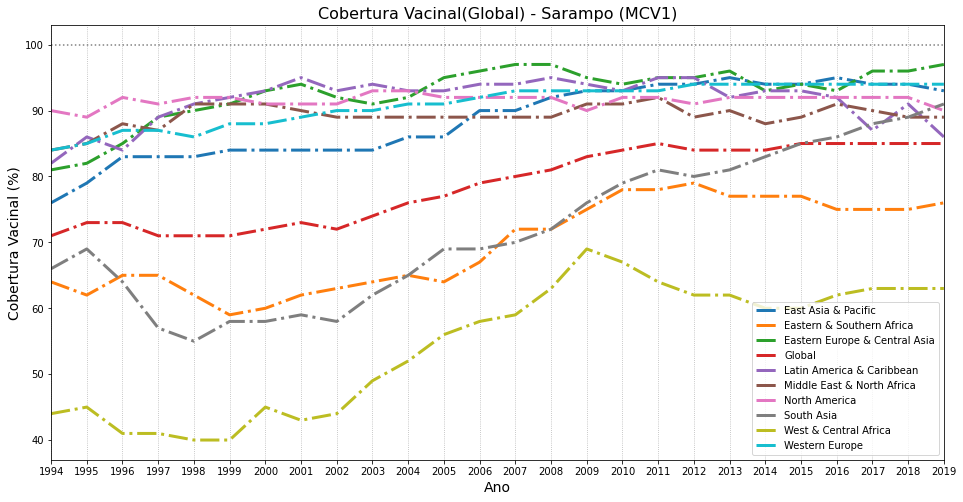

In [ ]:
#@title Cobertura Vacinal(Global) - Sarampo (MCV1)
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in global_mcv1.groupby("region"):
    ax = grp.plot(ax=ax,xlim = (1994,2019), kind='line', linestyle = "dashdot",linewidth = 3, x="year", y="coverage", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal(Global) - Sarampo (MCV1)", fontsize = 16)
plt.hlines(100,1994,2019,color = "grey", linestyles='dotted', label="")
plt.xticks(np.arange(1994, 2020, step=1))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Cobertura Vacinal (%)", fontsize=14)
plt.yscale("linear")
plt.show()

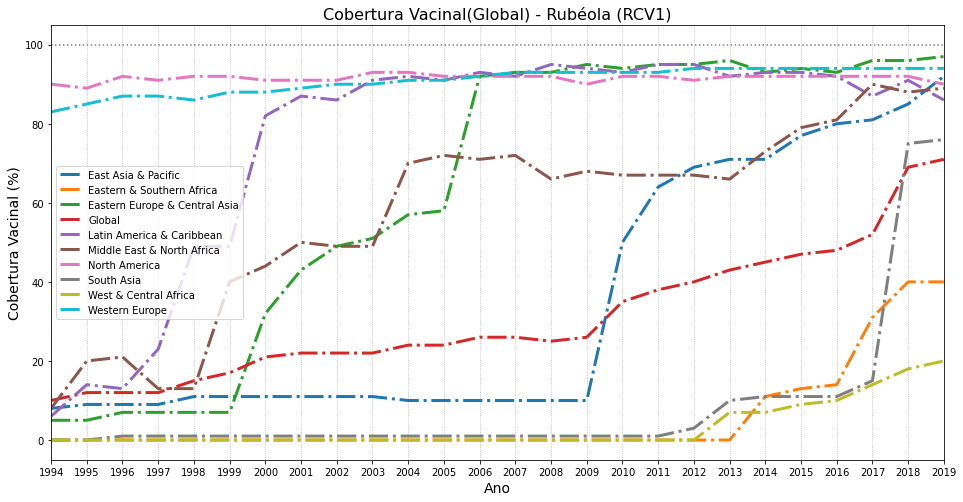

In [ ]:
#@title Cobertura Vacinal (Global) - Rubéola (RCV1)
fig, ax = plt.subplots()

color = next(ax._get_lines.prop_cycler)['color']
for key, grp in global_rcv1.groupby("region"):
    ax = grp.plot(ax=ax,xlim = (1994,2019), kind='line', linestyle = "dashdot",linewidth = 3, x="year", y="coverage", label=key, figsize = (16,8), color = color)
    color = next(ax._get_lines.prop_cycler)['color']
    

plt.title("Cobertura Vacinal(Global) - Rubéola (RCV1)", fontsize = 16)
plt.hlines(100,1994,2019,color = "grey", linestyles='dotted', label="")
plt.xticks(np.arange(1994, 2020, step=1))
plt.legend()
plt.grid(axis = "x", linestyle = "dotted")
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Cobertura Vacinal (%)", fontsize=14)
plt.yscale("linear")
plt.show()

## Resultados da Parte 2

Podemos notar que, para todos as vacinas analisadas se repetem alguns fatos:
- o Brasil tem na série histórica com valores mais altos que a média global, o que mostra o bom resultado histórico na vacinação obtido pelas campanhas de imunização do SUS
- em quase todas as regiões do mundo a tendência é de manutenção ou aumento nas taxas de cobertura vacinal pelos imunizantes analisados neste trabalho
- nos últimos anos é notável que a cobertura vacinal no Brasil vem diminuindo, apesar de ainda se manter em níveis altos

O quadro geral mostra que aparentemente estamos indo na contramão do mundo e que, apesar de ainda não estarmos em níveis críticos, a situação da vacinação no Brasil merece atenção redobrada.

# Fontes:
- Dados sobre a Covid-19 no Brasil: https://brasil.io/dataset/covid19/caso/
- Dados sobre testes de Covid-19 realizados no Brasil: https://github.com/wcota/covid19br
- Dados sobre cobertura vacinal no Brasil: http://tabnet.datasus.gov.br/
- Estimativas sobre a cobertura vacinal no mundo: https://www.who.int/data/gho/data/themes/immunization